In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.offline as py 
py.init_notebook_mode(connected=True) # 為了能在本地端調用
import plotly.graph_objs as go
import plotly.tools as tls
import chart_studio.plotly as py               #plotly.plotly module is deprecated
import plotly.figure_factory as ff  #會噴error
#from plotly.tools import FigureFactory as ff
import cufflinks as cf  #這個mode
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑體
plt.rcParams['axes.unicode_minus'] = False    # 解決無法顯示符號
sns.set(font='SimHei', font_scale=0.8)     # 解决Seaborn中文顯示問題

In [2]:
calendar = pd.read_csv('C:/Users/user/Desktop/medium文案/Finformation當資料科學遇上財務金融/toranto house data/calendar.csv')
listing = pd.read_csv('C:/Users/user/Desktop/medium文案/Finformation當資料科學遇上財務金融/toranto house data/listings.csv')
listingsdeep = pd.read_csv('C:/Users/user/Desktop/medium文案/Finformation當資料科學遇上財務金融/toranto house data/listingsdeep.csv')
grouped_df = listingsdeep.groupby('neighbourhood_cleansed').count()[['id']].sort_values('id' , ascending = True).tail(10)#哪一個區域中的房源比較多

In [3]:
dic = {}

for i in [i for i in grouped_df.index]:
    dic.setdefault(i,[i for i in listingsdeep.loc[listingsdeep.neighbourhood_cleansed.str.contains(i)]['price']])


In [4]:
all_price = []
for i in [i for i in grouped_df.index]:
      a = list(dic[i])
      all_price.append(a)  
print(len(all_price[1]))

448


<AxesSubplot:title={'center':'各個區域的房價分佈'}, xlabel='neighbourhood_cleansed', ylabel='price'>

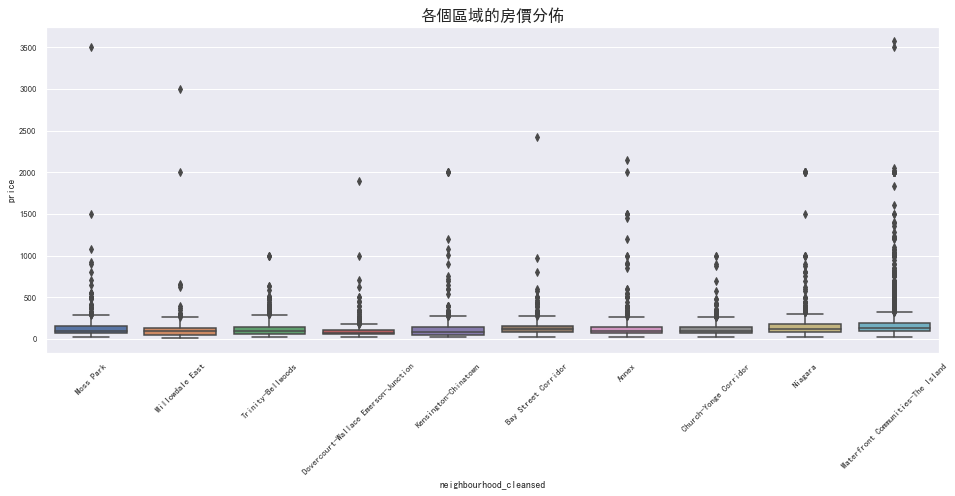

In [5]:
#由於加拿大區域太多,房源供給前10名,各個區域的房價分佈
listingsdeep['price'] = listingsdeep['price'].str.replace(',' , '').str.replace('$' , '').astype(float)
drop_outlier_price_condition = listingsdeep.loc[(listingsdeep.price<=4000) & (listingsdeep.price > 0)]

plt.figure(figsize = (16 , 6))   
plt.title('各個區域的房價分佈' , fontsize = 16)
plt.xticks(rotation = 45)
sns.boxplot(y='price' , x = 'neighbourhood_cleansed' , data = drop_outlier_price_condition , order=  grouped_df.index,)
#data有篩選出來,order打出相對應的名稱就會跑出盒狀圖,非常方便
#有些地方outlier很多,雖然可能是Waterfront Communities-The Island房源真的太多,高出第二位畢竟快 7倍 

<AxesSubplot:title={'center':'room_type 屬性的影響'}, xlabel='room_type', ylabel='price'>

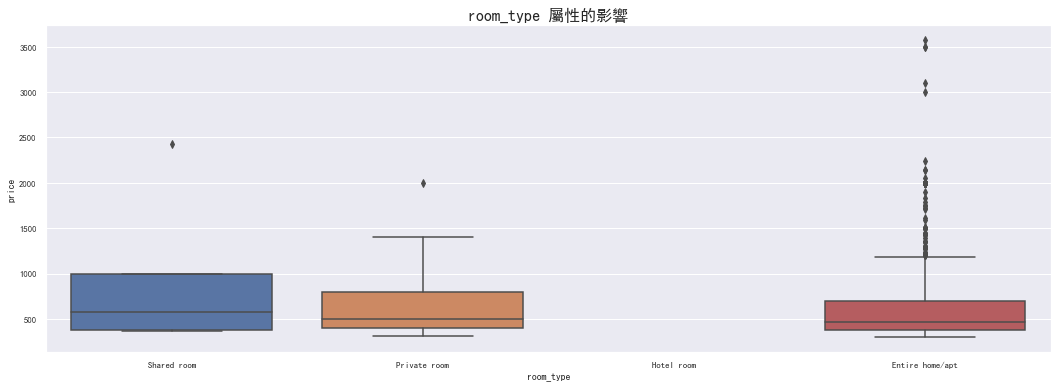

In [6]:
drop_outlier_price_condition = listingsdeep.loc[(listingsdeep.price<=4000) & (listingsdeep.price > 300)]

    
plt.figure(figsize = (18,6))
plt.title( 'room_type 屬性的影響' , fontsize = 16)
sns.boxplot(y=  'price' , x=  'room_type' , data = drop_outlier_price_condition , order = set(listing.room_type))
#發現 Hotel room 的盒狀分析圖不見了?觀察一下資料,因為y軸是價格,可能是價格上有些貓逆

In [7]:
[i for i in listingsdeep.room_type ].count('Hotel room')
listingsdeep.loc[listingsdeep.room_type.str.contains('Hotel room')]['price']
#結果發現原來 room_type中的 Hotel room 房價偏低,因此把下限調整一下

529      102.0
531      261.0
939       35.0
5027      72.0
5030      36.0
5031      36.0
5032      36.0
5033      36.0
6089      36.0
6106      36.0
6119      72.0
6165      36.0
6623      36.0
6728      32.0
6739      32.0
6770      32.0
7248     199.0
8114     133.0
8146     181.0
8147     172.0
8422     149.0
8423     159.0
8424     149.0
8425     179.0
8580     181.0
8582     181.0
8585     133.0
8587     133.0
8590     151.0
8591     151.0
8592     151.0
8595     151.0
8597     151.0
10264     35.0
11595     78.0
11731     79.0
11806     75.0
11818     75.0
11821     75.0
11822     75.0
11823     75.0
11824     75.0
11825     75.0
11827     75.0
11832     75.0
12746     38.0
12801     99.0
12824     57.0
12933    112.0
12935     76.0
12936     77.0
12937     67.0
13155     80.0
13388     99.0
13390     35.0
13395     35.0
15413      0.0
15793      0.0
Name: price, dtype: float64

<AxesSubplot:title={'center':'room_type 屬性的影響'}, xlabel='room_type', ylabel='price'>

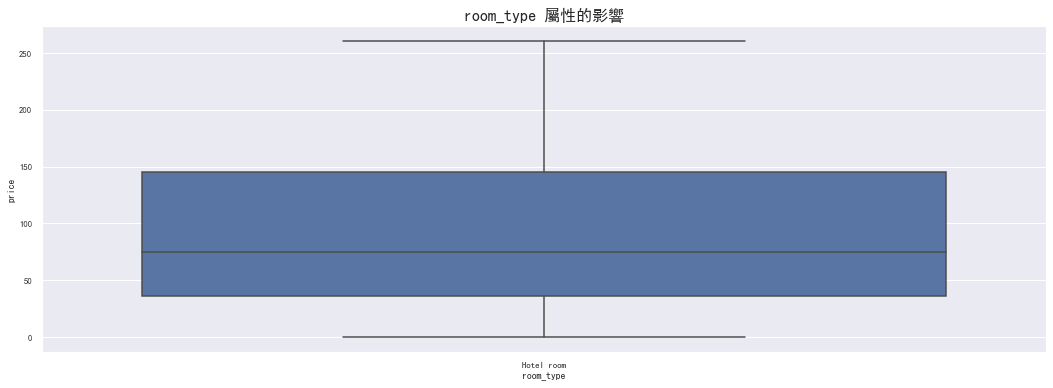

In [8]:
Hotel_room_price= listingsdeep.loc[listingsdeep.room_type.str.contains('Hotel room')]
#因為它價格太低了,單獨做一盒子好了
order = ['Hotel room']
    
plt.figure(figsize = (18,6))
plt.title( 'room_type 屬性的影響' , fontsize = 16)
sns.boxplot(y=  'price' , x=  'room_type' , data = Hotel_room_price , order = order)

In [9]:
dic = {}
for i in  set(listingsdeep.property_type):
    property_count = list((listingsdeep.property_type)).count(i)
    dic.setdefault(i,property_count)

dic

{'Private room in hostel': 4,
 'Private room in resort': 1,
 'Shared room in bed and breakfast': 2,
 'Private room in barn': 3,
 'Entire place': 9,
 'Shared room in tiny house': 7,
 'Private room in castle': 1,
 'Private room in apartment': 1345,
 'Shared room': 1,
 'Shared room in villa': 2,
 'Entire villa': 13,
 'Room in bed and breakfast': 4,
 'Barn': 1,
 'Private room in earth house': 1,
 'Earth house': 1,
 'Room in hotel': 34,
 'Entire house': 1869,
 'Camper/RV': 2,
 'Private room in casa particular': 2,
 'Private room in serviced apartment': 11,
 'Private room in guest suite': 146,
 'Shared room in condominium': 53,
 'Entire townhouse': 319,
 'Shared room in bungalow': 8,
 'Shared room in guest suite': 1,
 'Private room in bungalow': 395,
 'Entire home/apt': 4,
 'Entire guest suite': 690,
 'Boat': 4,
 'Entire serviced apartment': 37,
 'Entire guesthouse': 44,
 'Entire apartment': 3823,
 'Shared room in guesthouse': 2,
 'Shared room in barn': 2,
 'Entire cabin': 1,
 'Entire loft':

In [10]:
# for i in  set(listingsdeep.property_type):
#     if dic[i] < 20:
#         del dic[i]
dic  
dic_fix = pd.Series(dic,index=dic.keys())
dic_fix

Private room in hostel               4
Private room in resort               1
Shared room in bed and breakfast     2
Private room in barn                 3
Entire place                         9
                                    ..
Entire floor                         5
Room in aparthotel                  20
Tiny house                           7
Private room in cottage              5
Private room in guesthouse          54
Length: 67, dtype: int64

In [11]:
drop_outlier_price_condition.pivot(columns = 'property_type' , values ='price').iplot(kind = 'box')
grouped_df = drop_outlier_price_condition.pivot(columns = 'room_type' , values ='price')
grouped_df.iplot(kind = 'hist' , title = 'Entire home/apt 價格從貴到便宜都有')

<AxesSubplot:>

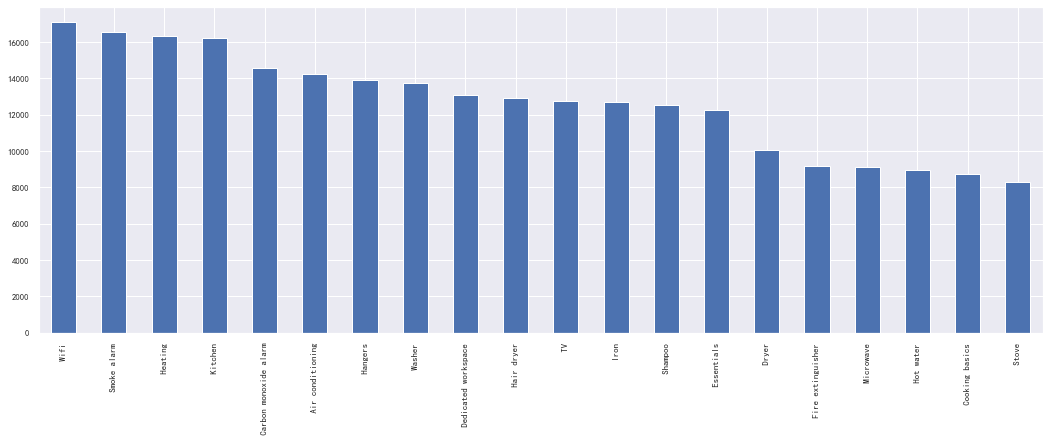

In [12]:
#如果房東要提高租屋品質該注意時麼
listingsdeep['amenities'] = listingsdeep.amenities.str.replace('[{}]' , '').str.replace('"','')
listingsdeep.amenities.head()
all_item_ls = np.concatenate(listingsdeep.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=  (18 , 6))
Top20_item.plot(kind = 'bar')
#plt.xticks(rotation = 45)
#wifi好像是全世界都很重要的事情,再來是吸菸區,跟廚房烤箱諸如跟「吃」有關的事

<Figure size 1296x432 with 0 Axes>

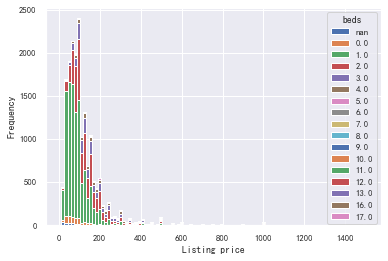

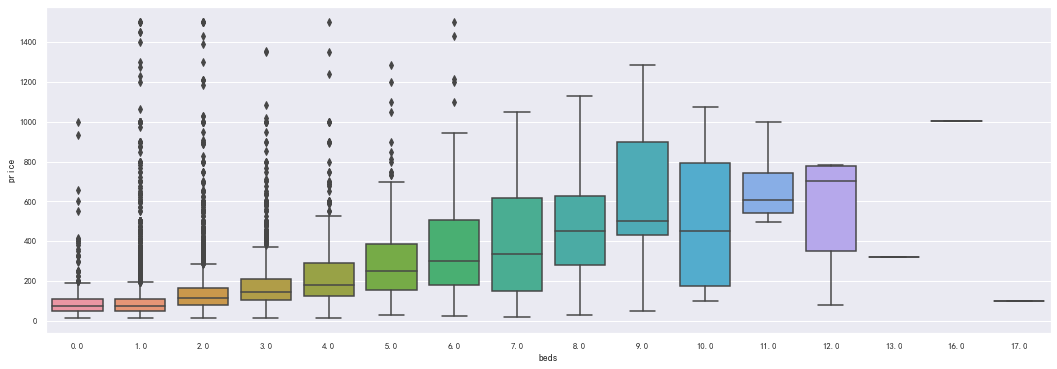

In [13]:
plt.figure(figsize = (18 , 6))
drop_outlier_price_condition = listingsdeep.loc[(listingsdeep.price<=1500) & (listingsdeep.price > 0)]
drop_outlier_price_condition.pivot(columns='beds' , values = 'price')\
.plot( kind = 'hist', stacked = True, bins =100)
plt.xlabel('Listing price')
plt.figure(figsize = (18,6))
sns.boxplot(y=  'price' , x=  'beds' , data = drop_outlier_price_condition)
plt.show()
#感覺單人床佔大部分
#然後單人床也是從高級到便宜都有
#然後10張床以上感覺像青旅?大家一起睡?

check  list:   
1.房價分析尋找會影響房價的變量   
2.category label 處理讓sklearn看的懂    
3.lost value    
4.test data,train data,   
5.cross validation  Baseline（基礎比較）L1、L2 Regression   
6.Random Forest、XGboost Regressor (modeling)   
7.利用model畫出變數重要性，方便我們優化模型    
8.持續優化    

<AxesSubplot:>

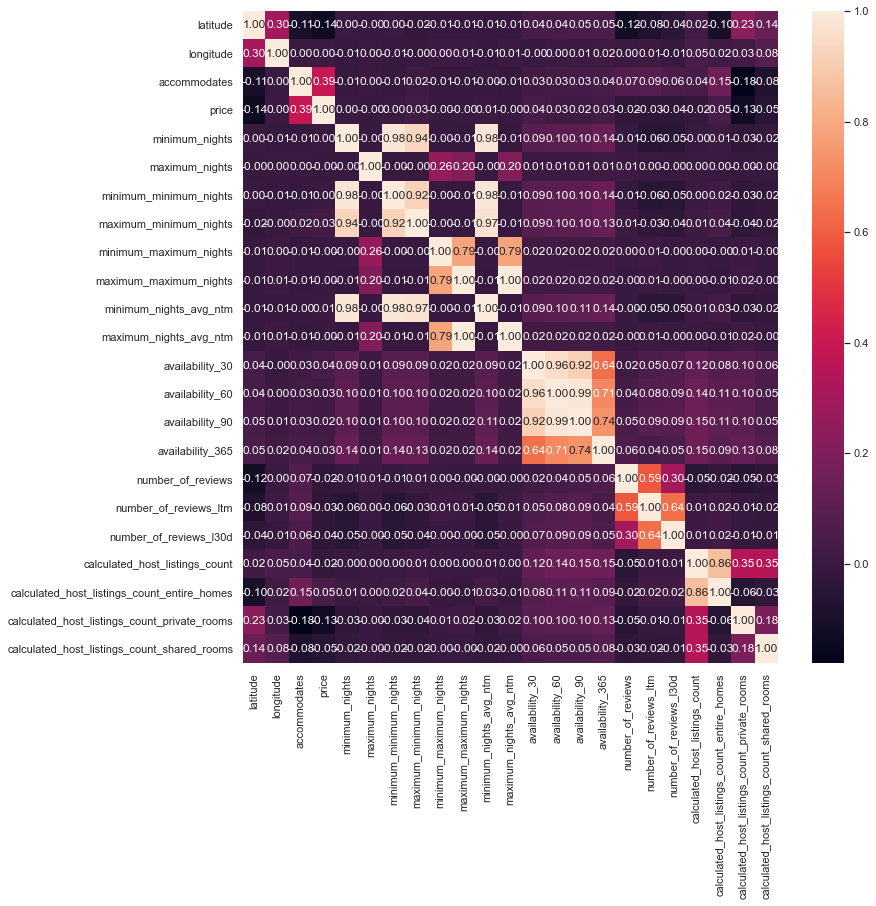

In [14]:
continual_var = listingsdeep.select_dtypes(np.number).columns  #選取數字型資料
drop_outlier_price_condition = listingsdeep.loc[(listingsdeep.price<=4000) & (listingsdeep.price > 0)]
no_null_col = drop_outlier_price_condition[continual_var].isnull().sum()==0
no_null_col = no_null_col[no_null_col == True].index.tolist()

#移除掉id類別的變量
no_null_col = no_null_col[3:]

corr = drop_outlier_price_condition[no_null_col].dropna().corr()
plt.figure(figsize = (12,12))
sns.set(font_scale = 1)
sns.heatmap(corr , cbar=True , annot = True  , fmt = '.2f')

資料來源:http://insideairbnb.com/get-the-data.html  